In [ ]:
import json
import pandas as pd

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
f = open("/content/drive/MyDrive/Capstone_project_data/data_TALLRec/movie/train.json", "r")
MovieLens_data = json.load(f)
f.close()

In [ ]:
data = pd.read_csv("/content/drive/MyDrive/Capstone_project_data/MovieLens_Data/u.data", header = None, sep='\t', names = ["user_id", "item_id", "rating", "timestamp"])


# Exploratory Data Analysis

In [ ]:
data

,user_id,item_id,rating,timestamp
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596
...,...,...,...,...
99995,880,476,3,880175444
99996,716,204,5,879795543
99997,276,1090,1,874795795
99998,13,225,2,882399156


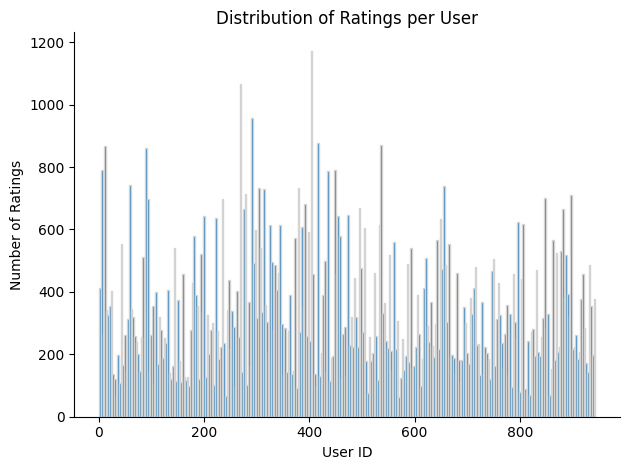

In [ ]:
from matplotlib import pyplot as plt

# histogram
data['user_id'].plot(kind='hist', bins=300, title='Distribution of Ratings per User', edgecolor='lightgrey')

# axes
plt.xlabel('User ID')
plt.ylabel('Number of Ratings')
plt.gca().spines[['top', 'right']].set_visible(False)


plt.tight_layout()
plt.show()

In [ ]:
print(f"Number of users: {len(set(data['user_id']))}")
print(f"Number of Movies: {len(set(data['item_id']))}")
print(f"Number of Ratings: {len(data)}")

Number of users: 943
Number of Movies: 1682
Number of Ratings: 100000


In [ ]:
data.describe()

,user_id,item_id,rating,timestamp
count,100000.00000,100000.000000,100000.000000,1.000000e+05
mean,462.48475,425.530130,3.529860,8.835289e+08
std,266.61442,330.798356,1.125674,5.343856e+06
min,1.00000,1.000000,1.000000,8.747247e+08
25%,254.00000,175.000000,3.000000,8.794487e+08
50%,447.00000,322.000000,4.000000,8.828269e+08
75%,682.00000,631.000000,4.000000,8.882600e+08
max,943.00000,1682.000000,5.000000,8.932866e+08


In [ ]:
data.loc[1].to_list()

[186, 302, 3, 891717742]

In [ ]:
movies_data = pd.read_csv("/content/drive/MyDrive/Capstone_project_data/MovieLens_Data/u.item", sep="|", names=["movie_id", "movie_title", "release_date", "video_release_date",
              "IMDb_URL", "unknown", "Action", "Adventure", "Animation", "Children's", "Comedy", "Crime", "Documentary", "Drama", "Fantasy", "Film-Noir", "Horror", "Musical", "Mystery", "Romance", "Sci-Fi",
              "Thriller", "War", "Western"], encoding = "ISO-8859-1")



In [ ]:
movies_data

,movie_id,movie_title,release_date,video_release_date,IMDb_URL,unknown,Action,Adventure,Animation,Children's,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
1,2,GoldenEye (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?GoldenEye%20(...,0,1,1,0,0,...,0,0,0,0,0,0,0,1,0,0
2,3,Four Rooms (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Four%20Rooms%...,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,4,Get Shorty (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Get%20Shorty%...,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,Copycat (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Copycat%20(1995),0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1677,1678,Mat' i syn (1997),06-Feb-1998,NaN,http://us.imdb.com/M/title-exact?Mat%27+i+syn+...,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1678,1679,B. Monkey (1998),06-Feb-1998,NaN,http://us.imdb.com/M/title-exact?B%2E+Monkey+(...,0,0,0,0,0,...,0,0,0,0,0,1,0,1,0,0
1679,1680,Sliding Doors (1998),01-Jan-1998,NaN,http://us.imdb.com/Title?Sliding+Doors+(1998),0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1680,1681,You So Crazy (1994),01-Jan-1994,NaN,http://us.imdb.com/M/title-exact?You%20So%20Cr...,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
movies_data[movies_data["movie_id"] == 100]

,movie_id,movie_title,release_date,video_release_date,IMDb_URL,unknown,Action,Adventure,Animation,Children's,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
99,100,Fargo (1996),14-Feb-1997,NaN,http://us.imdb.com/M/title-exact?Fargo%20(1996),0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


## Data Prep


In [ ]:
genre_strings = []
genre_columns = ["Action", "Adventure", "Animation", "Children's", "Comedy", "Crime", "Documentary", "Drama", "Fantasy", "Film-Noir", "Horror", "Musical", "Mystery", "Romance", "Sci-Fi",
              "Thriller", "War", "Western"]
for _, row in movies_data[genre_columns].iterrows():
    genres = []
    for genre in genre_columns:
        if row[genre] == 1:
            genres.append(genre)
    genre_string = ', '.join(genres)
    genre_strings.append(genre_string)

movies_data['genre_string'] = genre_strings

In [ ]:
movies_data.head()

,movie_id,movie_title,release_date,video_release_date,IMDb_URL,unknown,Action,Adventure,Animation,Children's,...,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,genre_string
0,1,Toy Story (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,"Animation, Children's, Comedy"
1,2,GoldenEye (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?GoldenEye%20(...,0,1,1,0,0,...,0,0,0,0,0,0,1,0,0,"Action, Adventure, Thriller"
2,3,Four Rooms (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Four%20Rooms%...,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,Thriller
3,4,Get Shorty (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Get%20Shorty%...,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,"Action, Comedy, Drama"
4,5,Copycat (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Copycat%20(1995),0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,"Crime, Drama, Thriller"


In [ ]:
movies_data

,movie_id,movie_title,release_date,video_release_date,IMDb_URL,unknown,Action,Adventure,Animation,Children's,...,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,genre_string
0,1,Toy Story (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,"Animation, Children's, Comedy"
1,2,GoldenEye (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?GoldenEye%20(...,0,1,1,0,0,...,0,0,0,0,0,0,1,0,0,"Action, Adventure, Thriller"
2,3,Four Rooms (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Four%20Rooms%...,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,Thriller
3,4,Get Shorty (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Get%20Shorty%...,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,"Action, Comedy, Drama"
4,5,Copycat (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Copycat%20(1995),0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,"Crime, Drama, Thriller"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1677,1678,Mat' i syn (1997),06-Feb-1998,NaN,http://us.imdb.com/M/title-exact?Mat%27+i+syn+...,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Drama
1678,1679,B. Monkey (1998),06-Feb-1998,NaN,http://us.imdb.com/M/title-exact?B%2E+Monkey+(...,0,0,0,0,0,...,0,0,0,0,1,0,1,0,0,"Romance, Thriller"
1679,1680,Sliding Doors (1998),01-Jan-1998,NaN,http://us.imdb.com/Title?Sliding+Doors+(1998),0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,"Drama, Romance"
1680,1681,You So Crazy (1994),01-Jan-1994,NaN,http://us.imdb.com/M/title-exact?You%20So%20Cr...,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Comedy


In [ ]:
movies_data.to_csv("/content/drive/MyDrive/Capstone_project_data/MovieLens_Data/movies_data.csv", index=False)

In [ ]:
data.head()

,user_id,item_id,rating,timestamp
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596


In [ ]:
rating_counts = data.groupby(['user_id']).size().reset_index(name='count')

In [ ]:
rating_counts

,user_id,count
0,1,272
1,2,62
2,3,54
3,4,24
4,5,175
...,...,...
938,939,49
939,940,107
940,941,22
941,942,79


In [ ]:
user_count = rating_counts[rating_counts["user_id"] == 1]["count"].values
user_count = int(user_count[0]) if len(user_count) > 0 else 0

In [ ]:
user_count

272

In [ ]:
train_data = []
test_data = []

train_count = {}
test_count = {}


for _, row in data.iterrows():

    user_id = int(row['user_id'])
    item_id = int(row['item_id'])
    rating = int(row['rating'])
    # print(f"Train number: {int(80 * 0.01 * user_counts.get(user_id))}, User ID: {user_id}")

    user_count = rating_counts[rating_counts["user_id"] == user_id]["count"].values
    if train_count.get(user_id, 0) < int(0.8 * user_count):
      train_data.append([user_id, item_id, rating])
      train_count[user_id] = train_count.get(user_id, 0) + 1
    else:
      test_data.append([user_id, item_id, rating])
      test_count[user_id] = test_count.get(user_id, 0) + 1

<ipython-input-29-fa2a732d172f>:16: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  if train_count.get(user_id, 0) < int(0.8 * user_count):


In [ ]:
len(train_data)

79619

In [ ]:
len(test_data)

20381

In [ ]:
train_df = pd.DataFrame(train_data, columns=["user_id", "item_id", "rating"])
test_df = pd.DataFrame(test_data, columns=["user_id", "item_id", "rating"])

In [ ]:
train_df

,user_id,item_id,rating
0,196,242,3
1,186,302,3
2,22,377,1
3,244,51,2
4,166,346,1
...,...,...,...
79614,938,591,3
79615,917,328,2
79616,938,252,4
79617,938,245,3


In [ ]:
test_df

,user_id,item_id,rating
0,310,181,4
1,310,1386,1
2,208,310,4
3,208,517,3
4,228,137,1
...,...,...,...
20376,880,476,3
20377,716,204,5
20378,276,1090,1
20379,13,225,2


In [ ]:
len(set(train_df["user_id"]))

943

In [ ]:
len(set(test_df["user_id"]))

943

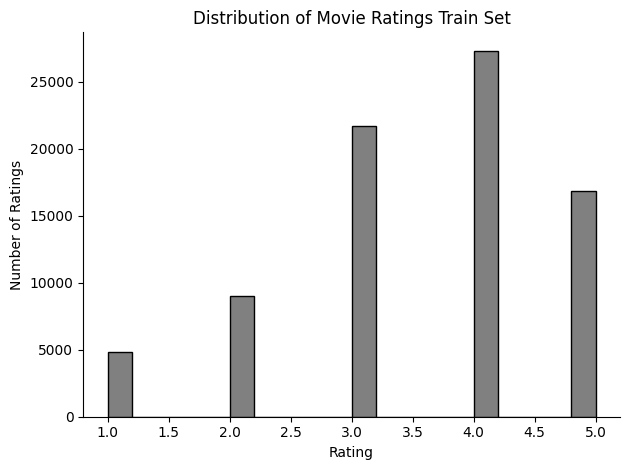

In [ ]:

train_df['rating'].plot(kind='hist', bins=20, title='Distribution of Movie Ratings Train Set', color= "grey", edgecolor='black')

# axes
plt.xlabel('Rating')
plt.ylabel('Number of Ratings')
plt.gca().spines[['top', 'right']].set_visible(False)

plt.tight_layout()
plt.show()

In [ ]:
test_df
# test_df.to_csv("/content/drive/MyDrive/Capstone_project_data/MovieLens_Data/test_data.csv", index=False)
# train_df.to_csv("/content/drive/MyDrive/Capstone_project_data/MovieLens_Data/train_data.csv", index=False)




,user_id,item_id,rating
0,310,181,4
1,310,1386,1
2,208,310,4
3,208,517,3
4,228,137,1
...,...,...,...
20376,880,476,3
20377,716,204,5
20378,276,1090,1
20379,13,225,2


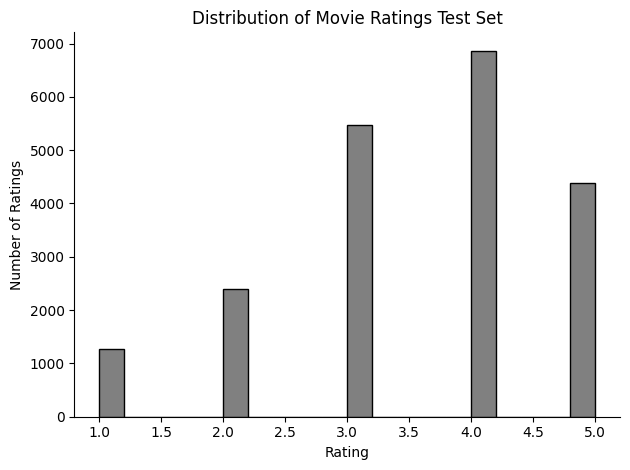

In [ ]:

test_df['rating'].plot(kind='hist', bins=20, title='Distribution of Movie Ratings Test Set', color= "grey", edgecolor='black')

# axes
plt.xlabel('Rating')
plt.ylabel('Number of Ratings')
plt.gca().spines[['top', 'right']].set_visible(False)

plt.tight_layout()
plt.show()

In [ ]:
train_df = pd.read_csv("/content/drive/MyDrive/Capstone_project_data/MovieLens_Data/train_data.csv")

In [ ]:
train_df

,user_id,item_id,rating
0,196,242,3
1,186,302,3
2,22,377,1
3,244,51,2
4,166,346,1
...,...,...,...
79614,938,591,3
79615,917,328,2
79616,938,252,4
79617,938,245,3


### Building User Profile

In [ ]:
# Keeping track of movies in train for each user so that we do not incldue these at test time
user_train_movies = {}
for _, row in train_df.iterrows():
    user_id = int(row['user_id'])
    item_id = int(row['item_id'])
    rating = int(row['rating'])
    user_train_movies[user_id] = user_train_movies.get(user_id, []) + [item_id]

In [ ]:
# user_train_movies[1]

In [ ]:
user_train_movies_df = pd.DataFrame([(user_id, movies) for user_id, movies in user_train_movies.items()], columns =["user_id", "train_movies"])

In [ ]:
user_train_movies_df
user_train_movies_df.to_csv("/content/drive/MyDrive/Capstone_project_data/MovieLens_Data/user_train_movies.csv", index=False)

In [ ]:
user_profile = {}
user_profile_movie_count = {}
for _, row in train_df.iterrows():
    user_id = int(row['user_id'])
    item_id = int(row['item_id'])
    rating = int(row['rating'])
    if user_profile_movie_count.get(user_id, 0) >= 10:
      continue


    user_profile_movie_count[user_id] = user_profile_movie_count.get(user_id, 0) + 1
    movie_name = movies_data[movies_data["movie_id"] == item_id]["movie_title"].values[0]
    movie_genre = movies_data[movies_data["movie_id"] == item_id]["genre_string"].values[0]
    history = f"Movie name: \"{movie_name}\", Movie Genre: {movie_genre} Rating: {rating}"
    if user_profile.get(user_id, "") == "":
      user_profile[user_id] = user_profile.get(user_id, "") + history
    else:
      user_profile[user_id] = user_profile.get(user_id, "") + ",\n" + history



In [ ]:
print(user_profile[4])

Movie name: "Mimic (1997)", Movie Genre: Sci-Fi, Thriller Rating: 3,
Movie name: "Ulee's Gold (1997)", Movie Genre: Drama Rating: 5,
Movie name: "Incognito (1997)", Movie Genre: Crime, Thriller Rating: 5,
Movie name: "One Flew Over the Cuckoo's Nest (1975)", Movie Genre: Drama Rating: 4,
Movie name: "Event Horizon (1997)", Movie Genre: Action, Mystery, Sci-Fi, Thriller Rating: 4,
Movie name: "Client, The (1994)", Movie Genre: Drama, Mystery, Thriller Rating: 3,
Movie name: "Liar Liar (1997)", Movie Genre: Comedy Rating: 5,
Movie name: "Scream (1996)", Movie Genre: Horror, Thriller Rating: 4,
Movie name: "Star Wars (1977)", Movie Genre: Action, Adventure, Romance, Sci-Fi, War Rating: 5,
Movie name: "Wedding Singer, The (1998)", Movie Genre: Comedy, Romance Rating: 5


In [ ]:
user_profile_df = pd.DataFrame([(user_id, history) for user_id, history in user_profile.items()], columns =["user_id", "train_movies"])

In [ ]:
user_profile_df

,user_id,train_movies
0,196,"Movie name: ""Kolya (1996)"", Movie Genre: Comed..."
1,186,"Movie name: ""L.A. Confidential (1997)"", Movie ..."
2,22,"Movie name: ""Heavyweights (1994)"", Movie Genre..."
3,244,"Movie name: ""Legends of the Fall (1994)"", Movi..."
4,166,"Movie name: ""Jackie Brown (1997)"", Movie Genre..."
...,...,...
938,939,"Movie name: ""Island of Dr. Moreau, The (1996)""..."
939,936,"Movie name: ""Trial and Error (1997)"", Movie Ge..."
940,930,"Movie name: ""Independence Day (ID4) (1996)"", M..."
941,920,"Movie name: ""Wag the Dog (1997)"", Movie Genre:..."


In [ ]:
user_profile_df.to_csv("/content/drive/MyDrive/Capstone_project_data/MovieLens_Data/user_profile.csv", index=False)

### Train Set Prep

In [ ]:

train_prompt_set = []

for _, row in train_df.iterrows():
    prompt = "Given below is a user's profile and a target movie. The profile contains up to 10 movies the user has rated.\nYour task is to predict the user's rating for the target movie."
    user_id = int(row['user_id'])
    item_id = int(row['item_id'])
    rating = int(row['rating'])

    user_profile = user_profile_df[user_profile_df["user_id"] == user_id]["train_movies"].values[0]
    target_movie = movies_data[movies_data["movie_id"] == item_id]["movie_title"].values[0]
    target_movie_genre = movies_data[movies_data["movie_id"] == item_id]["genre_string"].values[0]

    # Adding the tags that are required for fine-tuning gemma-2b-it
    formatted_prompt = (
        "<bos>\n"
        "<start_of_turn>user\n"
        f"{prompt}\n\n"
        f"User Profile:\n{user_profile}\n\n"
        f"Target movie: {target_movie}, target movie genre: {target_movie_genre}\n"
        f"Predict the rating the user will give the target movie by selecting a number between 0-5.\n"
        f"What will the user rate the target movie \"{target_movie}\"?\n"
        "<end_of_turn>\n"
        "<start_of_turn>model\n"
        f"{rating}\n"
        "<end_of_turn>"
    )

    train_prompt_set.append(formatted_prompt)

    print(f"{formatted_prompt}\n__________________________________")

Streaming output truncated to the last 5000 lines.
<bos>
<start_of_turn>user
Given below is a user's profile and a target movie. The profile contains up to 10 movies the user has rated.
Your task is to predict the user's rating for the target movie.

User Profile:
Movie name: "Six Degrees of Separation (1993)", Movie Genre: Drama, Mystery Rating: 5,
Movie name: "Roommates (1995)", Movie Genre: Comedy, Drama Rating: 3,
Movie name: "Men in Black (1997)", Movie Genre: Action, Adventure, Comedy, Sci-Fi Rating: 4,
Movie name: "Jungle2Jungle (1997)", Movie Genre: Children's, Comedy Rating: 3,
Movie name: "Seven Years in Tibet (1997)", Movie Genre: Drama, War Rating: 3,
Movie name: "George of the Jungle (1997)", Movie Genre: Children's, Comedy Rating: 4,
Movie name: "Antonia's Line (1995)", Movie Genre: Drama Rating: 4,
Movie name: "Pillow Book, The (1995)", Movie Genre: Drama, Romance Rating: 3,
Movie name: "Murder at 1600 (1997)", Movie Genre: Mystery, Thriller Rating: 3,
Movie name: "Spawn

In [ ]:
with open("/content/drive/MyDrive/Capstone_project_data/MovieLens_Data/train_prompt_set.json", "w") as file:
  json.dump(train_prompt_set, file)

In [ ]:
with open("/content/drive/MyDrive/Capstone_project_data/MovieLens_Data/train_prompt_set.json", "r") as file:
  prompts = json.load(file)

In [ ]:
len(prompts)

79619

In [ ]:
train_df = pd.read_csv("/content/drive/MyDrive/Capstone_project_data/MovieLens_Data/train_data.csv")

In [ ]:
train_df

,user_id,item_id,rating
0,196,242,3
1,186,302,3
2,22,377,1
3,244,51,2
4,166,346,1
...,...,...,...
79614,938,591,3
79615,917,328,2
79616,938,252,4
79617,938,245,3


In [ ]:
test_df_new = pd.read_csv("/content/drive/MyDrive/Capstone_project_data/MovieLens_Data/test_data.csv")

In [ ]:
test_df_new

,user_id,item_id,rating
0,310,181,4
1,310,1386,1
2,208,310,4
3,208,517,3
4,228,137,1
...,...,...,...
20376,880,476,3
20377,716,204,5
20378,276,1090,1
20379,13,225,2


In [ ]:
user_train_movies = {}
for _, row in train_df.iterrows():
    user_id = int(row['user_id'])
    item_id = int(row['item_id'])
    rating = int(row['rating'])
    user_train_movies[user_id] = user_train_movies.get(user_id, []) + [item_id]

In [ ]:
all_movies = set(movies_data["movie_id"])

In [ ]:
all_users = set(data["user_id"])

In [ ]:
len(all_movies)

1682

In [ ]:
len(all_users)

943

In [ ]:
user_test_movies = {}

for user_id in all_users:
  for movie_id in all_movies:
    if movie_id in user_train_movies[user_id]:
      continue
    user_test_movies[user_id] = user_test_movies.get(user_id, []) + [movie_id]

In [ ]:
user_test_hit_list = {}
for _, row in test_df_new.iterrows():
    user_id = int(row['user_id'])
    item_id = int(row['item_id'])
    rating = int(row['rating'])
    if rating > 3:
      user_test_hit_list[user_id] = user_test_hit_list.get(user_id, []) + [item_id]

In [ ]:
user_test_hit_list

{310: [181, 50, 1142],
 208: [310, 371, 66, 393],
 282: [343, 268, 319],
 261: [288, 245, 326, 300],
 278: [288, 538, 923, 515],
 150: [319, 276, 123, 291, 14],
 220: [289, 269, 340],
 27: [9, 1017, 123],
 96: [56, 89, 127, 144, 183, 265, 200, 514, 196, 234, 423],
 19: [325, 202, 8],
 195: [313, 276, 451, 134, 234, 582, 1315, 135, 242, 507, 615],
 335: [300, 322, 340],
 36: [1026, 878, 261],
 348: [123, 25, 974, 117, 237, 685, 827, 596],
 157: [515, 276, 244, 235, 1016],
 214: [516,
  93,
  508,
  191,
  1017,
  173,
  496,
  98,
  357,
  482,
  188,
  253,
  114,
  182,
  896,
  209,
  11,
  55],
 118: [201, 175, 672, 844, 558, 258, 172, 188, 508, 317, 234, 100, 179, 427],
 54: [307, 100, 346, 117, 240, 245, 250, 405],
 191: [331, 340, 316, 345, 315],
 108: [124, 7, 281, 1],
 241: [310, 268, 300, 286],
 317: [354, 260],
 264: [100,
  525,
  637,
  7,
  93,
  23,
  789,
  201,
  47,
  186,
  98,
  235,
  447,
  675,
  150,
  275,
  430,
  234,
  517,
  173,
  209],
 375: [603, 1217, 17